In [1]:
import torch
import numpy as np
import torch.nn as nn 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
material_1 = pd.read_excel('F:/00程序/Githubclone_Projects/ICNN/datasets/CoreLosses/附件一（训练集）.xlsx', sheet_name='材料1')
material_2 = pd.read_excel('F:/00程序/Githubclone_Projects/ICNN/datasets/CoreLosses/附件一（训练集）.xlsx', sheet_name='材料2')
material_3 = pd.read_excel('F:/00程序/Githubclone_Projects/ICNN/datasets/CoreLosses/附件一（训练集）.xlsx', sheet_name='材料3')
material_4 = pd.read_excel('F:/00程序/Githubclone_Projects/ICNN/datasets/CoreLosses/附件一（训练集）.xlsx', sheet_name='材料4')
combined_material = pd.concat([material_1, material_2, material_3, material_4], axis=0, ignore_index=True)

In [3]:
# 标签
combined_material_label = np.zeros(combined_material.shape[0])

for i in range(combined_material.shape[0]):
    if combined_material.iloc[i,3] == '正弦波':
        combined_material_label[i] = 1
    elif combined_material.iloc[i,3] == '三角波':
        combined_material_label[i] = 2
    elif combined_material.iloc[i,3] == '梯形波':
        combined_material_label[i] = 3
combined_material_label = combined_material_label.astype(int)
combined_material_label

array([1, 1, 1, ..., 3, 3, 3])

In [4]:
# 进行独热编码
encoder = OneHotEncoder(sparse_output=False)
# encoder = OneHotEncoder(sparse_output=False, drop='first')
# temperature
T = combined_material.iloc[:,0]
# frequency
f = combined_material.iloc[:,1]

# 对 T f 进行标准化处理
scaler = StandardScaler()
T_scaled = scaler.fit_transform(T.values.reshape(-1, 1)).ravel()
T_encoded = encoder.fit_transform(T_scaled.reshape(-1, 1))
f_scaled = scaler.fit_transform(f.values.reshape(-1, 1)).ravel()
f_log = np.log(f)
# wave type
W = combined_material_label

# material type
M = np.empty(12400, dtype=int)
# 填充 M 列
M[:3400] = 1
M[3400:6400] = 2
M[6400:9600] = 3
M[9600:] = 4
    

W_encoded = encoder.fit_transform(W.reshape(-1, 1))
M_encoded = encoder.fit_transform(M.reshape(-1, 1))
# wave features - B
# B_scaled = scaler.fit_transform(X_pca)

wave_signal = combined_material.iloc[:,4:].values
Bm = np.zeros(wave_signal.shape[0])

for i in range(wave_signal.shape[0]):
    Bm[i] = np.max(wave_signal[i,:])
Bm_log = np.log(Bm)

In [5]:
# X = np.column_stack((f_log, T*f_log, T**2*f_log, W_encoded, M_encoded, Bm_log, T*Bm_log, T**2*Bm_log))
X = np.column_stack((f_log, W_encoded, M_encoded, Bm_log, T))
X = torch.from_numpy(X).float()
X.shape

torch.Size([12400, 10])

In [6]:
y = combined_material.iloc[:,2]
y_np = y.to_numpy()
y_log = np.log(y_np)
y = torch.from_numpy(y_log).float().view(-1, 1)
y

tensor([[ 7.5999],
        [ 7.7947],
        [ 8.1115],
        ...,
        [10.7414],
        [11.0261],
        [11.5860]])

In [7]:
test_data = pd.read_excel('F:/00程序/Githubclone_Projects/ICNN/datasets/CoreLosses/附件三（测试集）.xlsx')
T_test = test_data.iloc[:,1] 
f_test = test_data.iloc[:,2]
M_test = np.zeros(test_data.shape[0])
W_test = np.zeros(test_data.shape[0])

for i in range(test_data.shape[0]):
    if test_data.iloc[i,3] == '材料1':
        M_test[i] = 1
    elif test_data.iloc[i,3] == '材料2':
        M_test[i] = 2
    elif test_data.iloc[i,3] == '材料3':
        M_test[i] = 3
    elif test_data.iloc[i,3] == '材料4':
        M_test[i] = 4
M_test = M_test.astype(int)


for i in range(test_data.shape[0]):
    if test_data.iloc[i,4] == '正弦波':
        W_test[i] = 1
    elif test_data.iloc[i,4] == '三角波':
        W_test[i] = 2
    elif test_data.iloc[i,4] == '梯形波':
        W_test[i] = 3
W_test = W_test.astype(int)

wave_signal_test = test_data.iloc[:,5:].values
Bm_test = np.zeros(wave_signal_test.shape[0])
for i in range(wave_signal_test.shape[0]):
    Bm_test[i] = np.max(wave_signal_test[i,:])
    
    
    
W_test_encoded = encoder.fit_transform(W_test.reshape(-1, 1))
M_test_encoded = encoder.fit_transform(M_test.reshape(-1, 1))
Bm_test_log = np.log(Bm_test)
f_test_log = np.log(f_test)

In [8]:
# X_test = np.column_stack((f_test_log, T_test * f_test_log, T_test ** 2 * f_test_log, W_test_encoded, M_test_encoded, Bm_test_log, T_test * Bm_test_log, T_test ** 2 * Bm_test_log))
X_test = np.column_stack((f_test_log, W_test_encoded, M_test_encoded, Bm_test_log, T_test))
X_test = torch.from_numpy(X_test).float()
X_test

tensor([[10.9388,  1.0000,  0.0000,  ...,  0.0000, -2.7736, 25.0000],
        [11.2830,  1.0000,  0.0000,  ...,  0.0000, -2.7767, 25.0000],
        [11.3973,  1.0000,  0.0000,  ...,  0.0000, -2.6590, 25.0000],
        ...,
        [11.9751,  0.0000,  0.0000,  ...,  1.0000, -1.9831, 90.0000],
        [12.0890,  0.0000,  0.0000,  ...,  1.0000, -1.9864, 90.0000],
        [12.2020,  0.0000,  0.0000,  ...,  1.0000, -4.5133, 90.0000]])

In [9]:
class ICNN(nn.Module):
    def __init__(self, activ, layers, scale=None, device="cuda:0", dtype=torch.float32):
        super(ICNN, self).__init__()
        weight_dims = list(zip(layers[1:], layers))
        self.As = nn.ParameterList()
        self.Ws = nn.ParameterList()
        self.bs = nn.ParameterList()
        self.scale = scale
        first_idim = weight_dims[0][1]
        self.layers = layers
        self.activ_id = activ
        self.device = device
        self.dtype = dtype
        for odim, idim in weight_dims:
            self.As.append(nn.Parameter(torch.tensor(np.random.normal(size=(odim, first_idim)), device=self.device)))
            self.Ws.append(nn.Parameter(torch.tensor(np.random.uniform(size=(odim, idim), low=0, high=1), device=self.device)))
            self.bs.append(nn.Parameter(torch.tensor(np.random.normal(size=(odim,)), device=self.device)))
        if(activ == "relu"):
            self.activ = nn.ReLU()
        elif(activ == "linear"):
            self.activ = lambda x: x
        else:
            raise Exception("Unsupported activation function")
            
    def forward(self, z):
        z0 = z.clone().to(self.dtype)
        layers = list(zip(self.As, self.Ws, self.bs))
        
        for (A, W, b) in layers[:-1]:
            A = A.to(self.dtype)
            W = W.to(self.dtype)
            b = b.to(self.dtype)
            z = self.activ(z0 @ torch.t(A) + z @ torch.t(W) + b)
        
        out_A, out_W, out_b = layers[-1]
        out_A = out_A.to(self.dtype)
        out_W = out_W.to(self.dtype)
        out_b = out_b.to(self.dtype)
        z = z0 @ torch.t(out_A) + z @ torch.t(out_W) + out_b
        if(self.scale is not None):
            return z * self.scale
        else:
            return z

In [10]:
# 将 X_tensor 和 y_tensor 移动到 GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
X = X.to(device)
y = y.to(device)
X_test = X_test.to(device)
print(device)
y

cuda:0


tensor([[ 7.5999],
        [ 7.7947],
        [ 8.1115],
        ...,
        [10.7414],
        [11.0261],
        [11.5860]], device='cuda:0')

In [12]:
model = ICNN(activ='relu', layers=[10, 500, 1], device='cuda:0')
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
i = 0
MSE_error = []
MAPE_error = []
while(True):
    y_pred = model(X)
    optimizer.zero_grad()
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    loss_MAPE = torch.mean(torch.abs(y_pred - y) / y)*100.0
    
    # 确保权重非负
    with torch.no_grad():
        for param in model.parameters():
            param.clamp_(min=0)
    i += 1
    if i % 1000 == 0:
        print("第{}次训练，MSE是{}, MAPE是{} ".format(i, loss.item(), loss_MAPE.item()))
        MSE_error.append(loss.item())
        MAPE_error.append(loss_MAPE.item())
    if loss.item() < 0.179:
        # 保存当前所有的网络参数
        torch.save(model.state_dict(), 'model.pth')
        print("训练满足精度要求，训练了{}次。".format(i))
        break
print("--------- 以下开始测试 ---------")
y_test = model(X_test)
print(y_test)
    

plt.figure(figsize=(8, 5))
plt.plot(range(0, len(MSE_error) * 1000, 1000), MSE_error, color ='blue', marker='o', linestyle='-', markersize=5, label='MSE Error')
plt.plot(range(0, len(MAPE_error) * 1000, 1000), MAPE_error, color ='red', marker='x', linestyle='-', markersize=5, label='MAPE Error')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('MSE and MAPE(%) Errors vs Iteration')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# 显示图像
plt.show()  


cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0
cuda:0

KeyboardInterrupt: 

In [ ]:
y_true = np.exp(y_test.detach().cpu().numpy())
y_true

In [ ]:
plt.figure(figsize=(8, 5))

# 创建主轴
ax1 = plt.gca()  # 获取当前的 Axes 对象
ax1.plot(range(0, len(MSE_error) * 1000, 1000), MSE_error, color='blue', marker='o', linestyle='-', markersize=5, label='MSE Error')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('MSE Error', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.7)

# 创建副轴
ax2 = ax1.twinx()  # 创建与 ax1 共享 x 轴的新 Axes 对象
ax2.plot(range(0, len(MAPE_error) * 1000, 1000), MAPE_error, color='red', marker='x', linestyle='-', markersize=5, label='MAPE Error')
ax2.set_ylabel('MAPE Error (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 添加图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 添加标题
plt.title('MSE and MAPE(%) Errors vs Iteration')

# 显示图像
plt.show() 

In [4]:
from scipy.io import savemat

# 获取模型的状态字典
state_dict = model.state_dict()

# 打印每个参数的名称和形状
for name, param in state_dict.items():
    print(f'Parameter: {name}, Shape: {param.shape}, Values: {param}')
    
    
# 将参数保存到 .mat 文件中
mat_data = {}
for name, param in state_dict.items():
    mat_data[name] = param.cpu().numpy()

savemat('model_parameters.mat', mat_data)

NameError: name 'model' is not defined

In [3]:
state_dict = torch.load('model.pth')
# 定义保存文件的路径
output_file = 'parameters.xlsx'
# 使用 ExcelWriter 管理 Excel 文件
with pd.ExcelWriter(output_file) as writer:
    # 遍历状态字典中的每个参数
    for name, param in state_dict.items():
        # 将张量转换为 NumPy 数组
        param_values = param.cpu().numpy()
        
        # 创建一个 DataFrame 来存储当前参数的值
        df = pd.DataFrame(param_values)
        
        # 将当前参数的 DataFrame 写入 Excel 的一个新表中
        df.to_excel(writer, sheet_name=name, index=False)

print(f"Parameters saved to separate sheets in {output_file}")

C:\Users\HP\AppData\Local\Temp\ipykernel_9052\332686227.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('model.pth')


Parameters saved to separate sheets in parameters.xlsx


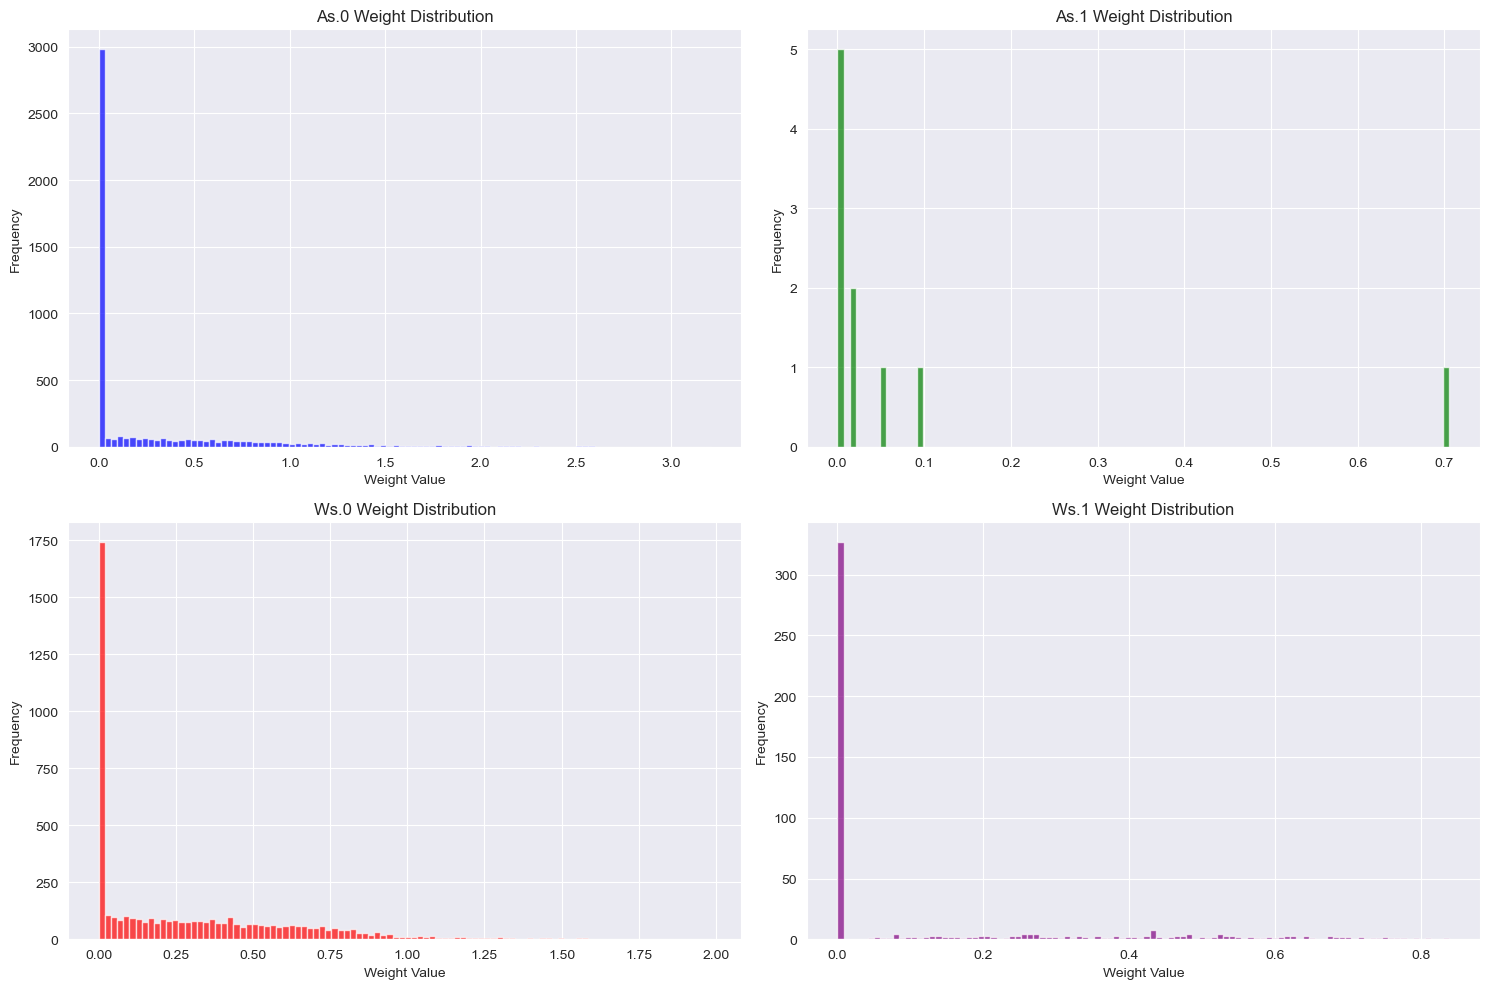

In [8]:
# 获取权重
as_0 = state_dict['As.0'].cpu().detach().numpy().flatten()
as_1 = state_dict['As.1'].cpu().detach().numpy().flatten()
ws_0 = state_dict['Ws.0'].cpu().detach().numpy().flatten()
ws_1 = state_dict['Ws.1'].cpu().detach().numpy().flatten()

# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 绘制 As.0 和 As.1 的权重分布
axs[0, 0].hist(as_0, bins=100, color='blue', alpha=0.7)
axs[0, 0].set_title('As.0 Weight Distribution')
axs[0, 0].set_xlabel('Weight Value')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(as_1, bins=100, color='green', alpha=0.7)
axs[0, 1].set_title('As.1 Weight Distribution')
axs[0, 1].set_xlabel('Weight Value')
axs[0, 1].set_ylabel('Frequency')

# 绘制 Ws.0 和 Ws.1 的权重分布
axs[1, 0].hist(ws_0, bins=100, color='red', alpha=0.7)
axs[1, 0].set_title('Ws.0 Weight Distribution')
axs[1, 0].set_xlabel('Weight Value')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(ws_1, bins=100, color='purple', alpha=0.7)
axs[1, 1].set_title('Ws.1 Weight Distribution')
axs[1, 1].set_xlabel('Weight Value')
axs[1, 1].set_ylabel('Frequency')

# 调整布局
plt.tight_layout()
plt.show()

In [7]:
# 获取模型的状态字典
state_dict = model.state_dict()

# 获取权重和偏置
A1 = state_dict['As.0'].cpu().detach().numpy()
W1 = state_dict['Ws.0'].cpu().detach().numpy()
b1 = state_dict['bs.0'].cpu().detach().numpy()

A2 = state_dict['As.1'].cpu().detach().numpy()
W2 = state_dict['Ws.1'].cpu().detach().numpy()
b2 = state_dict['bs.1'].cpu().detach().numpy()

# 定义输入
z = np.random.randn(1, 13)

# 计算输出
z0 = z
z1 = np.maximum(0, z0 @ A1.T + z @ W1.T + b1)
y = z0 @ A2.T + z1 @ W2.T + b2

print("Output:", y)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 13)